In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
df=pd.read_csv("Bengaluru_House_Data.csv")


In [8]:
df.head()


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [9]:
df.nunique()


area_type          4
availability      81
location        1305
size              31
society         2688
total_sqft      2117
bath              19
balcony            4
price           1994
dtype: int64

In [10]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [11]:
# Display summary statistics of numerical columns
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [12]:
df.columns


Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [13]:
df.isnull().sum()


area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [14]:
# Handle missing values
df = df.dropna()

In [15]:
df.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

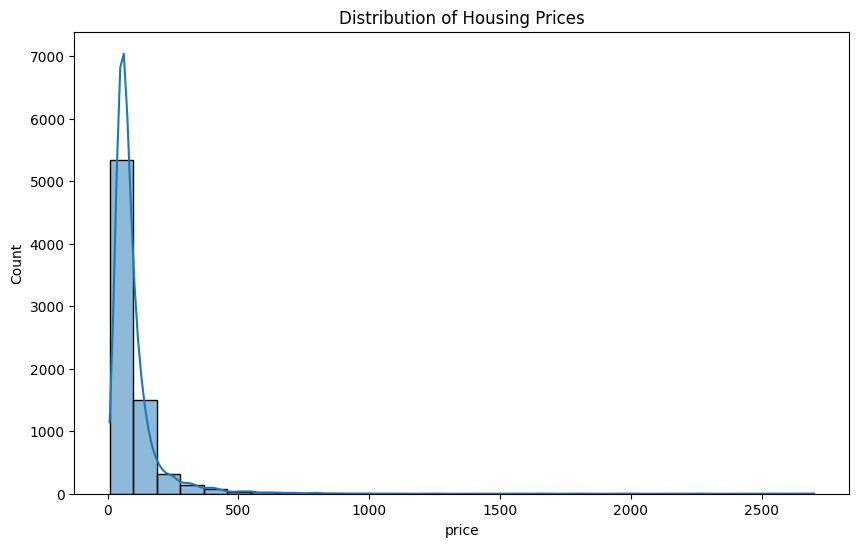

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of 'price'
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Housing Prices')
plt.show()

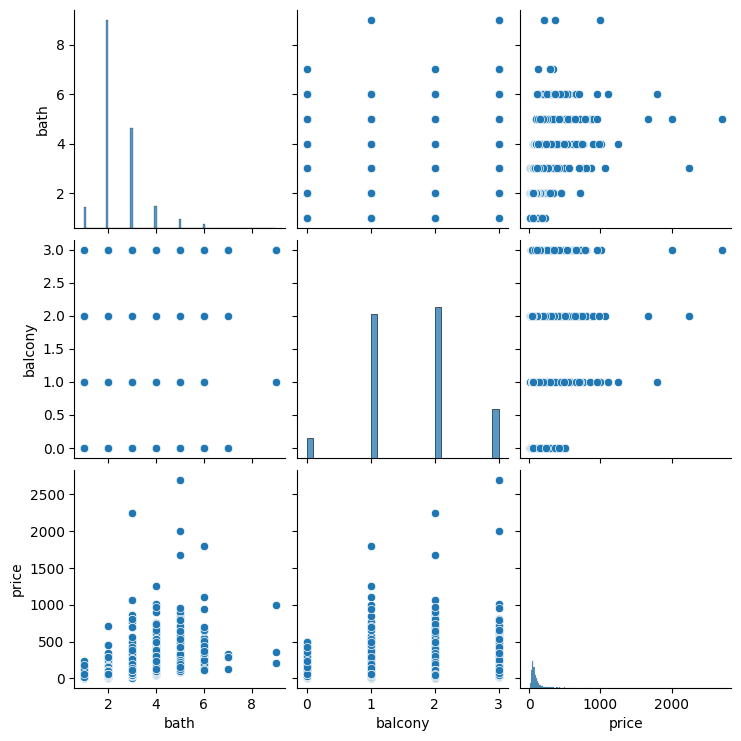

In [17]:
# Visualize relationships between features and target variable
sns.pairplot(df[['total_sqft', 'bath', 'balcony', 'price']])
plt.show()

In [20]:
df.select_dtypes(exclude='object').corr()

,bath,balcony,price
bath,1.000000,0.275726,0.594844
balcony,0.275726,1.000000,0.170138
price,0.594844,0.170138,1.000000


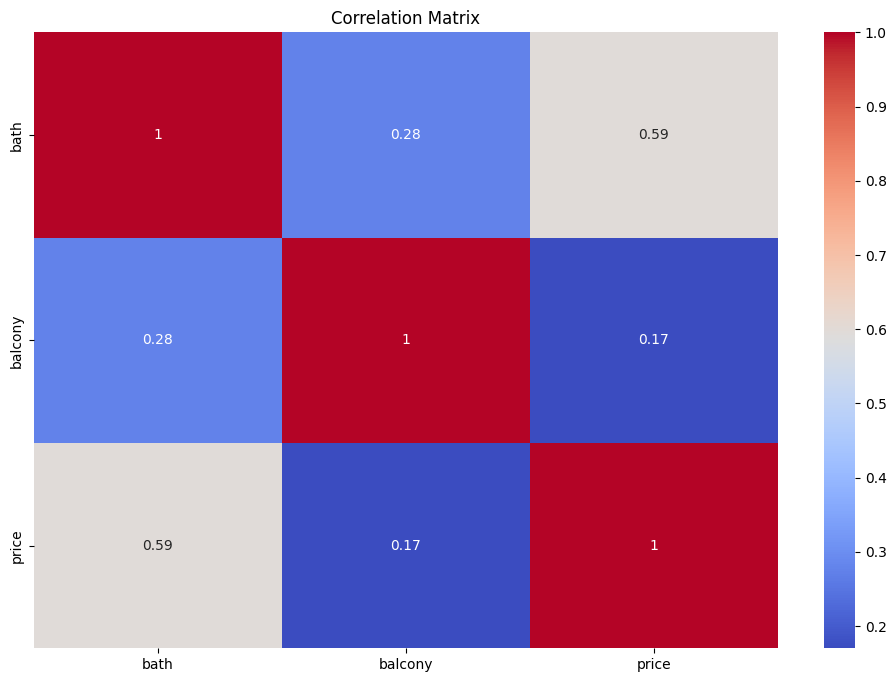

In [21]:
# Explore correlations
correlation_matrix = df.select_dtypes(exclude='object').corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [22]:
df['total_sqft'].value_counts()

total_sqft
1200           172
1100           106
1000            78
1500            74
1300            71
              ... 
2383             1
1103             1
1145 - 1340      1
3080             1
4689             1
Name: count, Length: 1682, dtype: int64

In [23]:
# Feature Engineering:

# Convert 'total_sqft' to numerical format (handle ranges and other non-numeric values)
def convert_total_sqft(total_sqft):
    try:
        # Check if the value is a range
        if '-' in total_sqft:
            tokens = total_sqft.split('-')
            return (float(tokens[0]) + float(tokens[1])) / 2
        # If it's a single value, convert to float
        return float(total_sqft)
    except:
        # If conversion fails, return NaN
        return None

In [24]:
# Apply the conversion function to 'total_sqft'
df['total_sqft'] = df['total_sqft'].apply(convert_total_sqft)

In [25]:
# Drop rows with missing values in 'total_sqft'
df = df.dropna(subset=['total_sqft'])

In [26]:
# Assume 'location', 'size', 'total_sqft', 'bath', 'balcony', etc., are features
X = df[['area_type', 'availability', 'location', 'size', 'society','total_sqft', 'bath', 'balcony']]

# Target variable
y = df['price']

In [27]:
# Convert categorical features using one-hot encoding or label encoding
X = pd.get_dummies(X, columns=['area_type', 'availability', 'location', 'size', 'society'], drop_first=True)

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=20)

In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [30]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [31]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR': SVR(),
    'KNeighbors': KNeighborsRegressor()
}  

In [32]:
for model_name, model in models.items():
    # For predicting price
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, predictions)
    
    r2 = r2_score(y_test, predictions)
    
    print(f"{model_name} - Likes: MAE={mae}, R^2={r2}")
    print("-----------------------------------------------------")

Linear Regression - Likes: MAE=1345048488017764.5, R^2=-1.8406117021668623e+27
-----------------------------------------------------
Decision Tree - Likes: MAE=21.328020491486175, R^2=0.6431446278409356
-----------------------------------------------------
AdaBoost - Likes: MAE=161.9620880634822, R^2=-1.5405542929996003
-----------------------------------------------------
Gradient Boosting - Likes: MAE=22.931442504491024, R^2=0.740535016792866
-----------------------------------------------------
SVR - Likes: MAE=45.82782364881454, R^2=-0.022684095227433643
-----------------------------------------------------
KNeighbors - Likes: MAE=29.90969472277889, R^2=0.4358898729044356
-----------------------------------------------------
